In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
data = {
    'tipo': ['Feature', 'Feature', 'Feature', 'Bug', 'Bug', 'Bug', 'User Story', 'User Story', 'User Story'],
    'prioridad': ['Must Have', 'Good', 'Nice to Have', 'Fix ASAP', 'Fix', 'Fix if Time', 'Must Have', 'Good', 'Nice to Have'],
    'prioridad_num': ['3', '4', '6', '1', '2', '5', '3', '4', '6'],
    'esfuerzo': [30, 20, 15, 2, 2, 5, 8, 5, 8],
    'tiempo': [40, 40, 20, 2, 8, 12, 10, 7, 7]
    
}

In [41]:
df = pd.DataFrame(data)
df

,tipo,prioridad,prioridad_num,esfuerzo,tiempo
0,Feature,Must Have,3,30,40
1,Feature,Good,4,20,40
2,Feature,Nice to Have,6,15,20
3,Bug,Fix ASAP,1,2,2
4,Bug,Fix,2,2,8
5,Bug,Fix if Time,5,5,12
6,User Story,Must Have,3,8,10
7,User Story,Good,4,5,7
8,User Story,Nice to Have,6,8,7




* ¿Cuál es la relación entre el tiempo y el esfuerzo?
* ¿Cuál es la relación entre la prioridad y el esfuerzo?
* ¿Cada prioridad cuántos días toma?
* ¿Cada tipo cuántos días se toma?



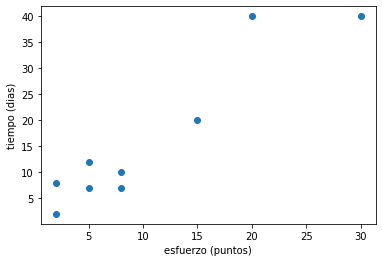

In [42]:
plt.scatter(df['esfuerzo'], df['tiempo'])
plt.xlabel('esfuerzo (puntos)')
plt.ylabel('tiempo (dias)')
plt.show()

correlación lineal positiva

In [53]:
df_agg = df.groupby(['prioridad', 'prioridad_num'], as_index=False).agg({'esfuerzo': 'sum', 'tiempo': 'sum'}).sort_values(by='prioridad_num', ascending=True)
df_agg['tiempo_cumsum'] = df_agg['tiempo'].cumsum()
df_agg

,prioridad,prioridad_num,esfuerzo,tiempo,tiempo_cumsum
1,Fix ASAP,1,2,2,2
0,Fix,2,2,8,10
4,Must Have,3,38,50,60
3,Good,4,25,47,107
2,Fix if Time,5,5,12,119
5,Nice to Have,6,23,27,146


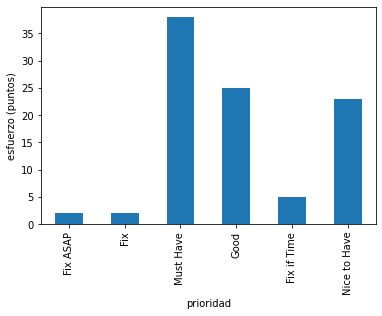

In [54]:
df_agg.plot.bar(x='prioridad', y='esfuerzo', legend=False)
plt.ylabel('esfuerzo (puntos)')
plt.show()

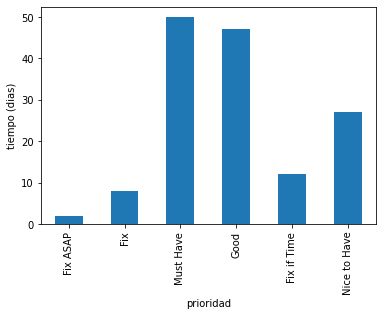

In [55]:
df_agg.plot.bar(x='prioridad', y='tiempo', legend=False)
plt.ylabel('tiempo (dias)')
plt.show()

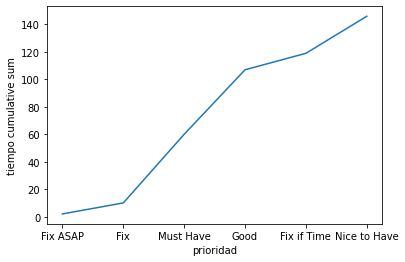

In [60]:
plt.plot(df_agg['prioridad'], df_agg['tiempo_cumsum'])
plt.ylabel('tiempo cumulative sum')
plt.xlabel('prioridad')
plt.show()